## Deteccion de anomalias
Para este ejemplo, tomaremos el mismo archivo CSV con informacion de numero de conexiones de 5 aplicaciones, en donde evaluaremos los datos de una aplicacion para determinar la zona de anomalias en dicho numero de conexiones.



In [2]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
sns.set()



#Leemos los datos
app_conn_df = pd.read_csv('App-connections.csv')
print('Mostramos un ejemplo de los datos obtenidos')
app_conn_df.head()

Mostramos un ejemplo de los datos obtenidos


,App 1,App 2,App 3,App 4,App 5
0,535,108,150,762,459
1,350,42,21,623,236
2,77,109,84,136,694
3,216,153,23,167,100
4,521,27,25,353,687


Ahora utilizaremos Machine Learning para encontrar la zona de anomalias. Esto nos permitira conocer en que rangos se considera que es un numero anomalo. Naturalmente, valores demasiado bajos o demasiado altos se consideraran como anomalias, pero tambien podriamos tener zonas en valores intermedios. Esto quiere decir que probablemente faltan mas muestras para este ejemplo

In [3]:
isolation_forest = IsolationForest(n_estimators=100)              #Creamos una instancia de isolation forest con 100 arboles
isolation_forest.fit(app_conn_df['App 1'].values.reshape(-1,1))   #Extraemos los datos de la aplicacion 1

#Ahora vamos a generar un conjunto de valores de muestra entre el mimino y maximo de numeros encontrados para la Applicacion 1,
#pero podria ser un numero mayor, como el valor de CONDBAT o algun otro numero mas grande.
xx = np.linspace(0, 800, len(app_conn_df)).reshape(-1,1)

anomaly_score = isolation_forest.decision_function(xx)            #Obtenemos el valor de deteccion de anomalias para cada numero
                                                                  #entre el rango de 0 y el valor maximo observado
                                                                  #el valor maximo podria ser incluso el numero de CONDBAT


outlier = isolation_forest.predict(xx)                            #Obtenemos el veredicto para cada valor observado

C:\Users\estja02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.

C:\Users\estja02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\estja02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



Ya tenemos todos los datos, ahora solamente falta mostrarlo en version grafica, para lo cual utilizaremos matplotlib por su conveniencia y facilidad de uso

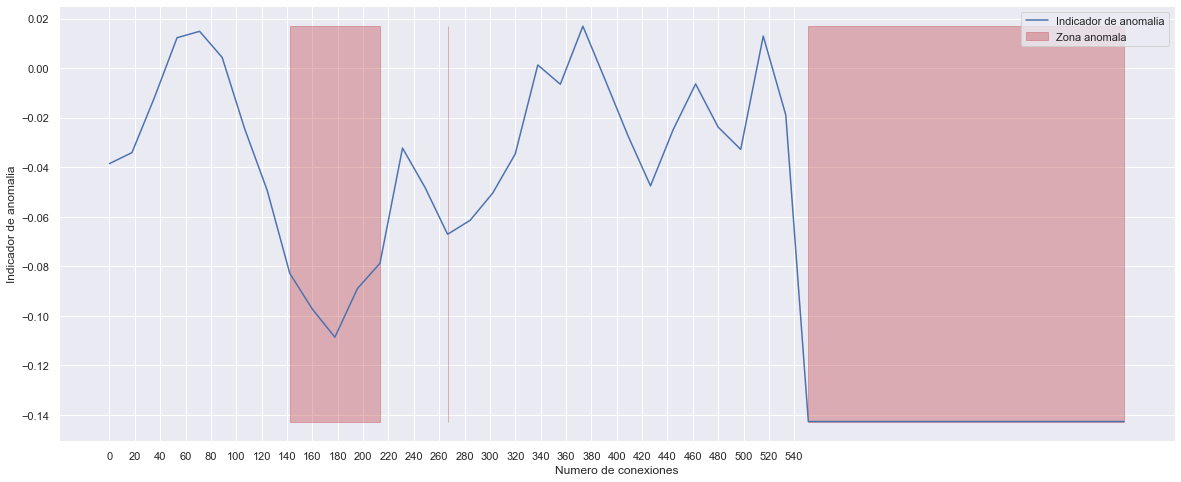

In [4]:
# Ahora mostramos una grafica de matplotlib
plt.figure(figsize = (20,8))
plt.plot(xx, anomaly_score, label='Indicador de anomalia')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                where=outlier==-1, color='r',
                alpha=.4, label='Zona anomala')
plt.legend()
plt.ylabel('Indicador de anomalia')
plt.xlabel('Numero de conexiones')
plt.xticks(np.arange(0,550,20))
plt.show()

Se observa que hay un rango de valores anomalos en cada extremo, y en las regiones sombreadas. 

El indicador de anomalia es una evaluacion sobre la profundidad del nodo que contiene dicha observacion, esto es... un indicador de cuantas veces se tuvo que dividir un arbol para tomar una decision.

Mientras mas bajo es el indicador, mayor sera la probabilidad de ser valor anomalo. Esto significa que la zona de anomalias se concentrara en la zona con valores mas bajos para este indicador.